# Problem Set 3
# Alexander Tyan

## Part 1: Image classification (5 points)

In [45]:
import random
import seaborn as sns
from keras.datasets import mnist
from keras.datasets import boston_housing
from keras import models
from keras import layers
from keras import optimizers
from keras import regularizers
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.cross_validation import train_test_split
keras.__version__
sns.set()

Set your random seed to 1234

In [3]:
random.seed(1234)

Load the MNIST dataset

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

Preprocess the data by converting the data to a 2D tensor with individual values between 0 and 1

In [5]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

Randomly split the training data into 50,000 training observations and 10,000 validation observations

In [20]:
partial_x_train, x_val, partial_y_train, y_val = train_test_split(train_images, train_labels, test_size=(1/6), random_state=25)

Implement a series of neural network models
- 5 dense, fully-connected layers
- relu activation except for the last layer (use softmax)
- Initialize with 512 hidden units apiece (except for the last layer)
- Use rmsprop optimizer
- Use categorical crossentropy for loss function
- Train with batch_size = 512 and 200 epochs
- Track validation set accuracy during training process

In [39]:
epochs_num = 10#200
batch_size = 512
hidden_nodes = 512

In [23]:
model_1 = models.Sequential()
model_1.add(layers.Dense(hidden_nodes, activation='relu', input_shape=(28 * 28,)))
model_1.add(layers.Dense(hidden_nodes, activation='relu'))
model_1.add(layers.Dense(hidden_nodes, activation='relu'))
model_1.add(layers.Dense(hidden_nodes, activation='relu'))
model_1.add(layers.Dense(10, activation='softmax'))

model_1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_1 = network.fit(partial_x_train, partial_y_train, 
                        epochs=epochs_num, batch_size=batch_size,
                        validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 8s 158us/step - loss: 0.0078 - acc: 0.9981 - val_loss: 0.1386 - val_acc: 0.9837
Epoch 2/10
50000/50000 [==============================] - 9s 184us/step - loss: 0.0063 - acc: 0.9986 - val_loss: 0.1619 - val_acc: 0.9818
Epoch 3/10
50000/50000 [==============================] - 9s 188us/step - loss: 0.0098 - acc: 0.9982 - val_loss: 0.1688 - val_acc: 0.9769
Epoch 4/10
50000/50000 [==============================] - 9s 172us/step - loss: 0.0064 - acc: 0.9986 - val_loss: 0.1857 - val_acc: 0.9794
Epoch 5/10
50000/50000 [==============================] - 9s 188us/step - loss: 0.0079 - acc: 0.9985 - val_loss: 0.1548 - val_acc: 0.9819
Epoch 6/10
50000/50000 [==============================] - 9s 178us/step - loss: 0.0084 - acc: 0.9985 - val_loss: 0.1587 - val_acc: 0.9817
Epoch 7/10
50000/50000 [==============================] - 8s 168us/step - loss: 0.0050 - acc: 0.9989 - val_loss: 0.1649 - 

- Plot the validation set accuracy and loss over the epochs

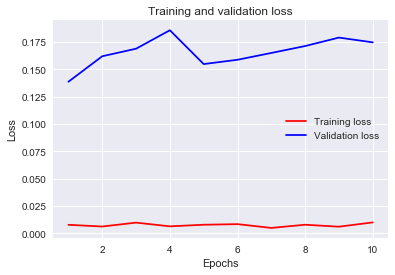

In [27]:
acc = history_1.history['acc']
val_acc = history_1.history['val_acc']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

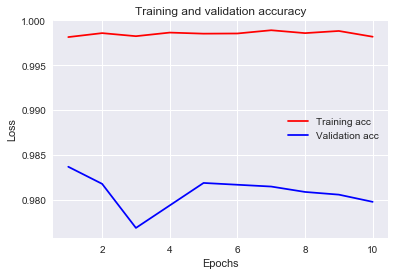

In [28]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Implement dropout

- Implement layer dropout after each layer from model 1 (except the last)
- Use a dropout rate of 0.5


In [41]:
model_drop = models.Sequential()
model_drop.add(layers.Dense(hidden_nodes, activation='relu', input_shape=(28 * 28,)))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(10, activation='softmax'))

model_drop.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

- Estimate the model, and graphically compare the validation loss across epochs to the initial model. How does this new model perform relative to the old model?

In [42]:
history_drop = model_drop.fit(partial_x_train, partial_y_train, 
                              epochs=epochs_num, batch_size=batch_size, 
                              validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 10s 206us/step - loss: 0.7206 - acc: 0.7622 - val_loss: 0.2466 - val_acc: 0.9265
Epoch 2/10
50000/50000 [==============================] - 12s 243us/step - loss: 0.2698 - acc: 0.9226 - val_loss: 0.2091 - val_acc: 0.9376
Epoch 3/10
50000/50000 [==============================] - 11s 225us/step - loss: 0.1955 - acc: 0.9436 - val_loss: 0.1429 - val_acc: 0.9606
Epoch 4/10
50000/50000 [==============================] - 11s 211us/step - loss: 0.1618 - acc: 0.9539 - val_loss: 0.1217 - val_acc: 0.9683
Epoch 5/10
50000/50000 [==============================] - 10s 206us/step - loss: 0.1453 - acc: 0.9586 - val_loss: 0.1073 - val_acc: 0.9708
Epoch 6/10
50000/50000 [==============================] - 10s 207us/step - loss: 0.1246 - acc: 0.9647 - val_loss: 0.1029 - val_acc: 0.9745
Epoch 7/10
50000/50000 [==============================] - 10s 202us/step - loss: 0.1133 - acc: 0.9674 - val_loss: 0.

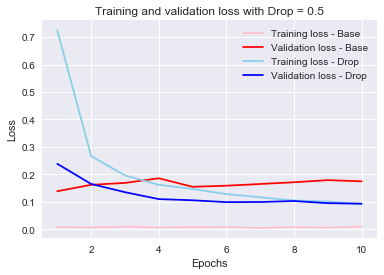

In [37]:
plt.clf()   # clear figure
#acc_drop = history_drop.history['acc']
#val_acc_drop = history_drop.history['val_acc']
loss_drop = history_drop.history['loss']
val_loss_drop = history_drop.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'pink', label='Training loss - Base')
plt.plot(epochs, val_loss, 'r', label='Validation loss - Base')
plt.plot(epochs, loss_drop, 'skyblue', label='Training loss - Drop')
plt.plot(epochs, val_loss_drop, 'b', label='Validation loss - Drop')
plt.title('Training and validation loss with Drop = 0.5')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Weight regularization


- Reestimate the initial model with L1 weight regularization on each layer (except the final layer) with a 0.001 penalty for each weight coefficient

In [26]:
model_l1 = models.Sequential()
model_l1.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu', input_shape=(28 * 28,)))
model_l1.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
model_l1.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
model_l1.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l1(0.001),
                          activation='relu'))
model_l1.add(layers.Dense(10, activation='softmax'))

model_l1.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_l1 = model_l1.fit(partial_x_train, partial_y_train,
                          epochs=epochs_num, batch_size=batch_size,
                          validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 188us/step - loss: 13.5230 - acc: 0.6713 - val_loss: 4.3020 - val_acc: 0.6154
Epoch 2/10
50000/50000 [==============================] - 9s 188us/step - loss: 3.0824 - acc: 0.7839 - val_loss: 2.4047 - val_acc: 0.8643
Epoch 3/10
50000/50000 [==============================] - 9s 179us/step - loss: 2.2506 - acc: 0.8277 - val_loss: 2.0317 - val_acc: 0.8487
Epoch 4/10
50000/50000 [==============================] - 9s 189us/step - loss: 1.9090 - acc: 0.8555 - val_loss: 1.7730 - val_acc: 0.8749
Epoch 5/10
50000/50000 [==============================] - 9s 187us/step - loss: 1.7178 - acc: 0.8724 - val_loss: 1.6819 - val_acc: 0.8720
Epoch 6/10
50000/50000 [==============================] - 9s 186us/step - loss: 1.5954 - acc: 0.8830 - val_loss: 1.5502 - val_acc: 0.8887
Epoch 7/10
50000/50000 [==============================] - 9s 176us/step - loss: 1.5051 - acc: 0.8911 - val_loss: 1.4574 -

- Reestimate the initial model with L2 weight regularization on each layer (except the final layer) with a 0.001 penalty for each weight coefficient

In [25]:
model_l2 = models.Sequential()
model_l2.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(28 * 28,)))
model_l2.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model_l2.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model_l2.add(layers.Dense(hidden_nodes, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
model_l2.add(layers.Dense(10, activation='softmax'))

model_l2.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_l2 = model_l2.fit(partial_x_train, partial_y_train,
                          epochs=epochs_num, batch_size=batch_size,
                          validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 180us/step - loss: 1.8061 - acc: 0.8267 - val_loss: 1.3228 - val_acc: 0.8477
Epoch 2/10
50000/50000 [==============================] - 9s 183us/step - loss: 0.8365 - acc: 0.9354 - val_loss: 0.6422 - val_acc: 0.9461
Epoch 3/10
50000/50000 [==============================] - 10s 195us/step - loss: 0.5285 - acc: 0.9527 - val_loss: 0.4266 - val_acc: 0.9602
Epoch 4/10
50000/50000 [==============================] - 9s 175us/step - loss: 0.3938 - acc: 0.9597 - val_loss: 0.3341 - val_acc: 0.9686
Epoch 5/10
50000/50000 [==============================] - 10s 207us/step - loss: 0.3266 - acc: 0.9646 - val_loss: 0.2843 - val_acc: 0.9719
Epoch 6/10
50000/50000 [==============================] - 10s 207us/step - loss: 0.2844 - acc: 0.9684 - val_loss: 0.2684 - val_acc: 0.9718
Epoch 7/10
50000/50000 [==============================] - 11s 210us/step - loss: 0.2546 - acc: 0.9714 - val_loss: 0.248

- Plot the validation loss for the initial model vs. the dropout vs. the L1 regularized model vs. the L2 regularized model - which model appears to perform the best?

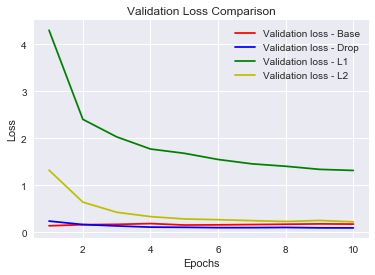

In [35]:
plt.clf()   # clear figure

val_l1 = history_l1.history['val_loss']
val_l2 = history_l2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, val_loss, 'r', label='Validation loss - Base')
plt.plot(epochs, val_loss_drop, 'b', label='Validation loss - Drop')
plt.plot(epochs, val_l1, 'g', label='Validation loss - L1')
plt.plot(epochs, val_l2, 'y', label='Validation loss - L2')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Final model

- Select the best model from the ones you have estimated so far - this should have the lowest validation loss score at any potential epoch

- Reestimate that model using all of the training data (no validation set) with the same batch size and the number of epochs necessary to achieve the lowest validation loss in the previous step

In [54]:
model_drop = models.Sequential()
model_drop.add(layers.Dense(hidden_nodes, activation='relu', input_shape=(28 * 28,)))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(hidden_nodes, activation='relu'))
model_drop.add(layers.Dropout(0.5))
model_drop.add(layers.Dense(10, activation='softmax'))

model_drop.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

history_drop_full = model_drop.fit(train_images, train_labels,
                                   epochs=epochs_num, batch_size=batch_size)

Epoch 1/10
60000/60000 [==============================] - 13s 212us/step - loss: 0.6452 - acc: 0.7899
Epoch 2/10
60000/60000 [==============================] - 13s 223us/step - loss: 0.2459 - acc: 0.9288
Epoch 3/10
60000/60000 [==============================] - 12s 200us/step - loss: 0.1852 - acc: 0.9465
Epoch 4/10
60000/60000 [==============================] - 12s 201us/step - loss: 0.1550 - acc: 0.9563
Epoch 5/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.1358 - acc: 0.9613
Epoch 6/10
60000/60000 [==============================] - 12s 199us/step - loss: 0.1238 - acc: 0.9658
Epoch 7/10
60000/60000 [==============================] - 12s 206us/step - loss: 0.1109 - acc: 0.9688
Epoch 8/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.1014 - acc: 0.9721
Epoch 9/10
60000/60000 [==============================] - 11s 191us/step - loss: 0.0957 - acc: 0.9736
Epoch 10/10
60000/60000 [==============================] - 12s 192us/step - loss: 

- Calcuate the test set loss and accuracy. How well does your model perform to the baseline from chapter 2.1 in the book?

In [55]:
test_loss, test_acc = model_drop.evaluate(test_images, test_labels)
print('Test set loss:', test_loss)

10000/10000 [==============================] - 1s 138us/step
Test set loss: 0.079890051269


In [56]:
print('Baseline accuracy from book: 0.9777')
print('Model accuracy:', test_acc)

Baseline accuracy from book: 0.9777
Model accuracy: 0.9806


## Part 2: Scalar regression (5 points)

- Use the Boston housing dataset from chapter 3.6 to predict median housing markets using a deep learning model
- Use 10-fold cross validation to monitor validation set performance

In [57]:
(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [58]:
# Prepare data, normalizing:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [59]:
def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model